In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("../data/flight_clustered.csv")
df.head()

,Loyalty,Recency,Frequency,Monetary,Discount,Cluster
0,2706,1,70,73564.66,0.961639,2
1,2597,7,70,73564.66,1.252314,2
2,2615,11,70,73564.66,1.254676,2
3,2047,97,23,73564.66,1.090870,2
4,1816,5,70,73564.66,0.970658,2


In [5]:
cluster_profile=df.groupby("Cluster").mean()
cluster_profile

,Loyalty,Recency,Frequency,Monetary,Discount
Cluster,,,,,
0,1033.295296,91.693264,12.632301,12083.779380,0.850270
1,2509.666798,107.174161,10.453367,8839.656260,0.703973
2,1945.856857,28.525769,44.196321,43933.554154,0.818442
3,907.617656,128.684728,6.702434,5007.095226,0.586884
4,1270.837211,494.873406,3.805296,3558.844904,0.731996


In [6]:
cluster_profile_norm = (
    cluster_profile - cluster_profile.min()
) / (cluster_profile.max() - cluster_profile.min())

cluster_profile_norm


,Loyalty,Recency,Frequency,Monetary,Discount
Cluster,,,,,
0,0.078448,0.135452,0.218539,0.211145,1.000000
1,1.000000,0.168648,0.164593,0.130795,0.444552
2,0.648070,0.000000,1.000000,1.000000,0.879157
3,0.000000,0.214773,0.071727,0.035870,0.000000
4,0.226722,1.000000,0.000000,0.000000,0.550947


In [7]:
segment_map = {
    0: "Potential Loyalists",
    1: "Regular Customers",
    2: "Loyal High-Value Customers",
    3: "At-Risk Customers",
    4: "Inactive Customers"
}

df["Segment"] = df["Cluster"].map(segment_map)

In [8]:
df["Segment"].value_counts()

Segment
At-Risk Customers             15983
Regular Customers             15279
Potential Loyalists           14074
Inactive Customers            11217
Loyal High-Value Customers     5491
Name: count, dtype: int64

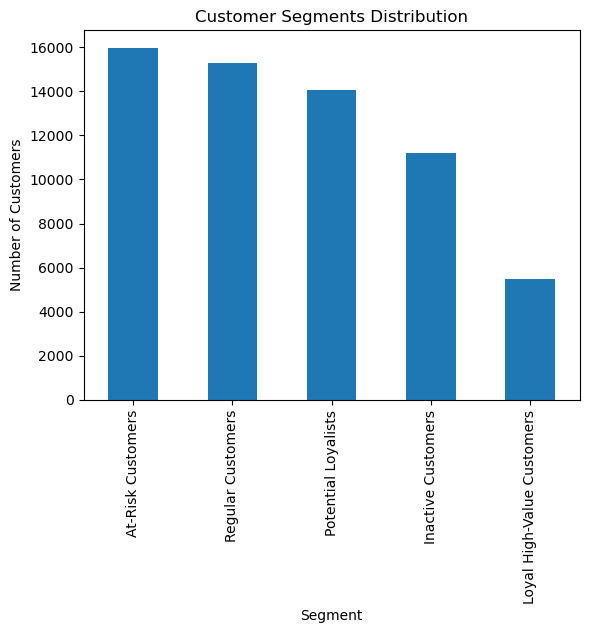

In [9]:
import matplotlib.pyplot as plt

df["Segment"].value_counts().plot(kind="bar", title="Customer Segments Distribution")
plt.ylabel("Number of Customers")
plt.show()

In [10]:
df.to_csv("../data/flight_segmented.csv", index=False)